**Import Library & Load Data**

In [1]:
!pip install tensorflow matplotlib scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


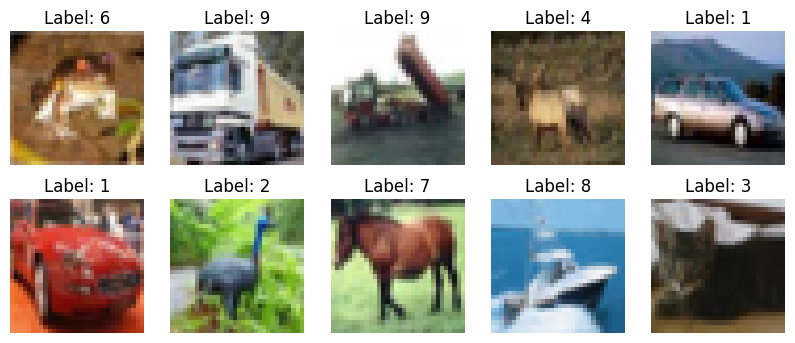

In [3]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi pixel (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels ke one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Visualisasi contoh gambar
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()

**Model Preprocessing**

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,794 (8.28 MB)

 Trainable params: 2,169,578 (8.28 MB)

 Non-trainable params: 1,216 (4.75 KB)

**Compile Model**

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Training Model**

In [6]:
history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 231ms/step - accuracy: 0.3926 - loss: 1.8690 - val_accuracy: 0.5608 - val_loss: 1.2109
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 229ms/step - accuracy: 0.6179 - loss: 1.0821 - val_accuracy: 0.6583 - val_loss: 0.9804
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 225ms/step - accuracy: 0.6819 - loss: 0.9091 - val_accuracy: 0.6477 - val_loss: 0.9841
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 224ms/step - accuracy: 0.7097 - loss: 0.8226 - val_accuracy: 0.7228 - val_loss: 0.8002
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.7328 - loss: 0.7523 - val_accuracy: 0.7430 - val_loss: 0.7173
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.7546 - loss: 0.6955 - val_accuracy: 0.6633 - val_loss: 0.9798
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.7711 - loss: 0.6502 - val_accuracy: 0.7460 - val_loss: 0.7306
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.7904 -

**Visualize Training**

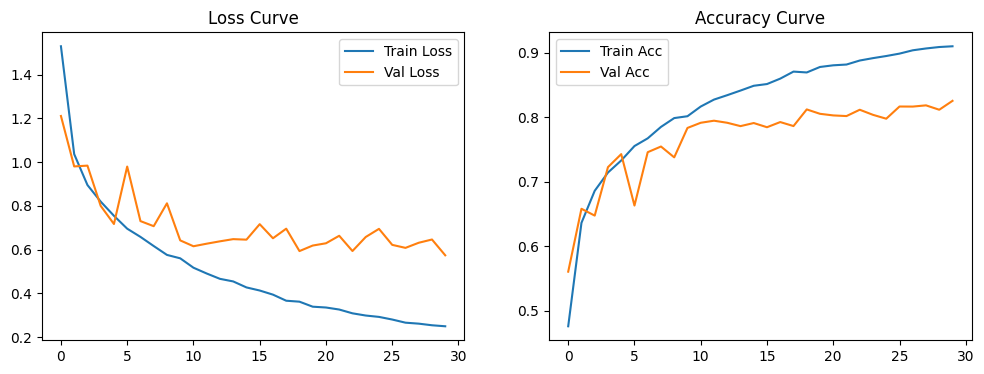

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

**Evalution Model**

In [8]:
# Evaluasi pada test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Prediksi
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

313/313 - 9s - 28ms/step - accuracy: 0.8223 - loss: 0.5926
Test Accuracy: 0.8223
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


**Classification Report & Confusion Matrix**

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.87      0.94      0.91      1000
           2       0.79      0.71      0.75      1000
           3       0.69      0.67      0.68      1000
           4       0.77      0.82      0.79      1000
           5       0.75      0.75      0.75      1000
           6       0.85      0.89      0.87      1000
           7       0.93      0.81      0.87      1000
           8       0.91      0.88      0.90      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



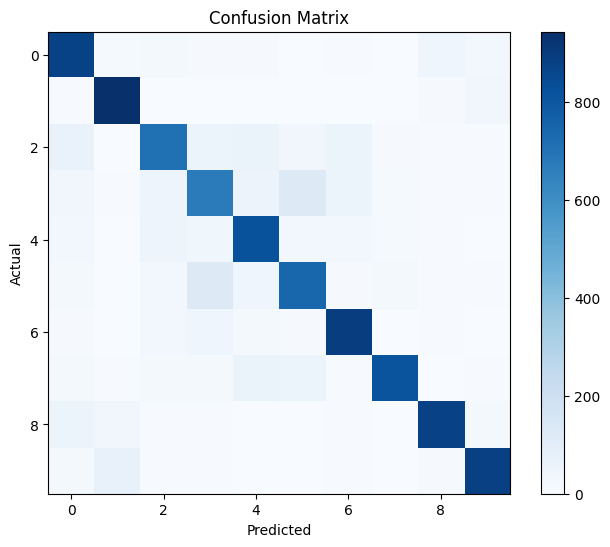

In [9]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Visualisasi Prediksi**

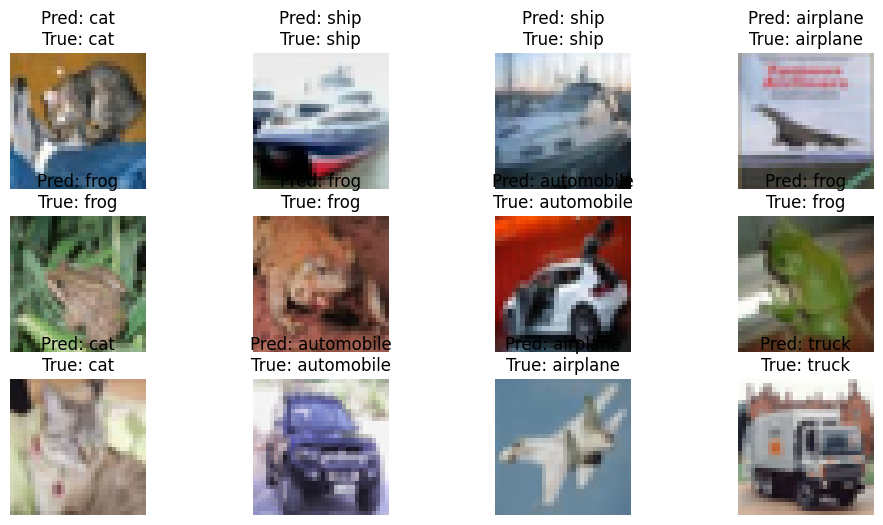

In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_true[i]]}")
    plt.axis('off')
plt.show()